In [21]:
#CNN의 가중치 변화
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from keras.datasets.fashion_mnist import load_data
np.random.seed(42)
tf.random.set_seed(42)
import matplotlib.pyplot as plt

In [22]:
m = keras.models.load_model('best2_m.h5')

In [23]:
m.layers

In [24]:
conv = m.layers[0]
conv.weights[0].shape, conv.weights[1].shape

(TensorShape([3, 3, 1, 32]), TensorShape([32]))

In [25]:
w = conv.weights[0].numpy()
w.mean(),w.std()#가중치의 평균,표준편차


(-0.029616972, 0.227983)

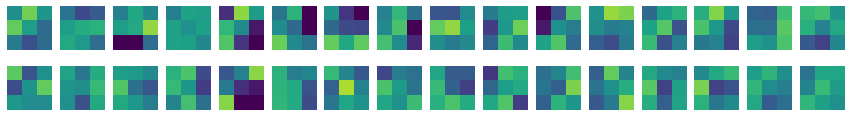

In [26]:
fig, axs = plt.subplots(2,16,figsize = (15,2))
for i in range(2):
    for j in range(16):
        axs[i,j].imshow(w[:,:,0,i*16+j],vmin=-0.5,vmax=0.5)
        axs[i,j].axis('off')

In [27]:
n_m = keras.Sequential()
n_m.add(keras.layers.Conv2D(32, kernel_size=3,activation='relu',padding='same'
                           ,input_shape=(28,28,1)))

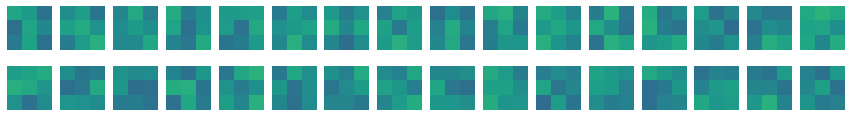

In [28]:
n_conv= n_m.layers[0]
n_w=n_conv.weights[0].numpy()#32게
fig, axs = plt.subplots(2,16,figsize = (15,2))
for i in range(2):
    for j in range(16):
        axs[i,j].imshow(n_w[:,:,0,i*16+j],vmin=-0.5,vmax=0.5)
        axs[i,j].axis('off')

(array([ 2.,  3.,  2.,  3.,  6., 39., 57., 82., 69., 25.]),
 array([-1.0800596 , -0.9341836 , -0.7883076 , -0.64243156, -0.49655557,
        -0.35067952, -0.20480351, -0.05892748,  0.08694854,  0.23282456,
         0.37870058], dtype=float32),
 <BarContainer object of 10 artists>)

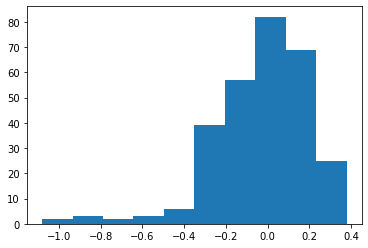

In [29]:
plt.hist(w.reshape(-1,1))

(array([31., 24., 32., 33., 29., 25., 36., 24., 25., 29.]),
 array([-0.14193562, -0.1136645 , -0.08539338, -0.05712227, -0.02885115,
        -0.00058004,  0.02769108,  0.0559622 ,  0.08423331,  0.11250443,
         0.14077555], dtype=float32),
 <BarContainer object of 10 artists>)

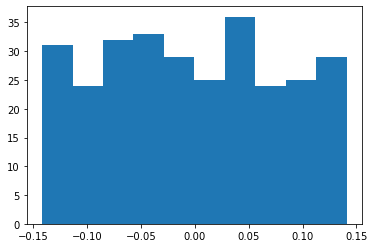

In [30]:
plt.hist(n_w.reshape(-1,1))

In [31]:
m.input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv2d_input')>

In [37]:
cov_act1=keras.Model(m.input,m.layers[0].output)#첫번째의 레이어를 출력으로 함
(x_data,y_data),(t_x_data,t_y_data) = keras.datasets.fashion_mnist.load_data()
in_data = x_data.reshape(-1,28,28,1)/255.0 

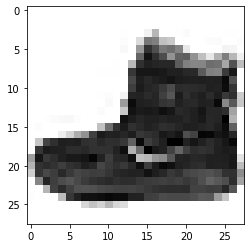

In [38]:
plt.imshow(x_data[0],cmap='gray_r')

In [41]:
f_map = cov_act1.predict(in_data[0:1])
f_map.shape#피쳐맵 /32개

(1, 28, 28, 32)

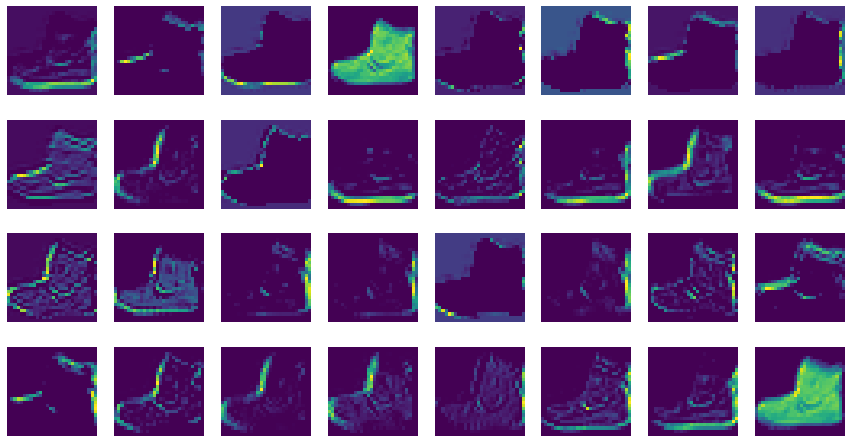

In [43]:
fig, axs = plt.subplots(4,8,figsize = (15,8))#피쳐맵에 맞게 플롯수 조정
for i in range(4):
    for j in range(8):
        axs[i,j].imshow(f_map[0,:,:,i*8+j])
        axs[i,j].axis('off')

In [45]:
#중간 폴링층 제외한 다음층
cov_act2=keras.Model(m.input,m.layers[2].output)
f2_map = cov_act2.predict(in_data[0:1])
f2_map.shape #64개

(1, 14, 14, 64)

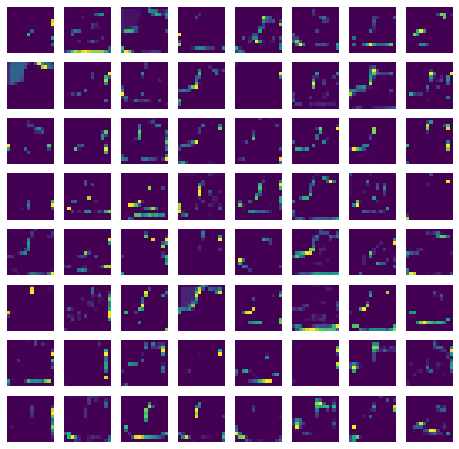

In [46]:
fig, axs = plt.subplots(8,8,figsize = (8,8))
for i in range(8):
    for j in range(8):
        axs[i,j].imshow(f2_map[0,:,:,i*8+j])
        axs[i,j].axis('off')